# **Project: Coffee Leaf Quadruple Classifier.**

## About Dataset

A particular data set that we have created for ourselves is a merging of the four datasets BrACoL , JMuBEN, JMuBEN2 , RoCoL , and LiCoLe, we have made several adjustments to fit us and we called the modified dataset is [Dataset_(CLQC)](/content/drive/MyDrive/Dataset_(CLQC)).

For this project, the following tools were used:
- [Tensorflow 2](https://www.tensorflow.org/install) for building and training the model;
- [Numpy](https://numpy.org/) for working with arrays;
- [Matplotlib](https://matplotlib.org/) for visualizing the data.




## Installing and importing dependencies

Let’s start by importing all the necessary libraries.

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import keras,os
import operator
import time
import itertools
import tensorflow
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from IPython.display import Image
from keras.preprocessing import image
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import sklearn
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import sklearn
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,classification_report
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

I've trained the model using Google Colab. The dataset was uploaded to my Google Drive and mounted it in Colab:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data preprocessing
The following steps of the data preprocessing are:
- data Augumentation;
- data samples visualization;

Let’s generate training and validation data using the data generator

In [ ]:
train_path = '/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Training_set/Stage_3'
valid_path = '/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Testing_or_Validation_set/Stage_3'

train_stage3 = os.path.join(train_path, 'Stage_3')
train_cercospora = os.path.join(train_stage3, '0_Cercospora')
train_phoma = os.path.join(train_stage3, '1_Phoma')
train_miner = os.path.join(train_stage3, '2_Miner')
train_redspidermite = os.path.join(train_stage3, '3_Red_Spider_Mite')

validation_stage3 = os.path.join(valid_path, 'Stage_3')
validation_cercospora = os.path.join(validation_stage3, '0_Cercospora')
validation_phoma = os.path.join(validation_stage3, '1_Phoma')
validation_miner = os.path.join(validation_stage3, '2_Miner')
validation_redspidermite = os.path.join(validation_stage3, '3_Red_Spider_Mite')

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True)
valid_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')
valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

LABELS = ['0_Cercospora', '1_Phoma', '2_Miner', '3_Red_Spider_Mite']
IMAGE_SIZE = [224, 224]
IMG_SHAPE  = 224
batch_size = 8

Found 8000 images belonging to 4 classes.
Found 177 images belonging to 4 classes.


In [ ]:
NM_train_0_Cercospora = len(os.listdir('/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Training_set/Stage_3/0_Cercospora'))
NM_train_1_Phom = len(os.listdir('/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Training_set/Stage_3/1_Phoma'))
NM_train_2_Miner = len(os.listdir('/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Training_set/Stage_3/2_Miner'))
NM_train_3_Red_Spider_Mite = len(os.listdir('/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Training_set/Stage_3/3_Red_Spider_Mite'))

NM_validation_0_Cercospora = len(os.listdir('/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Testing_or_Validation_set/Stage_3/0_Cercospora'))
NM_validation_1_Phom = len(os.listdir('/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Testing_or_Validation_set/Stage_3/1_Phoma'))
NM_validation_2_Miner = len(os.listdir('/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Testing_or_Validation_set/Stage_3/2_Miner'))
NM_validation_3_Red_Spider_Mite = len(os.listdir('/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Testing_or_Validation_set/Stage_3/3_Red_Spider_Mite'))

print("Total Training Rust Images",NM_train_0_Cercospora)
print("Total Training Brown Spots Images",NM_train_1_Phom)
print("Total Training Sooty Molds Images",NM_train_2_Miner)
print("Total Training Sooty Molds Images",NM_train_3_Red_Spider_Mite)
print("--")
print("Total validation Rust Images",NM_validation_0_Cercospora)
print("Total validation Brown Spots Images",NM_validation_1_Phom)
print("Total validation Sooty Molds Images",NM_validation_2_Miner)
print("Total validation Sooty Molds Images",NM_validation_3_Red_Spider_Mite)
print("--")
total_train = NM_train_0_Cercospora + NM_train_1_Phom + NM_train_2_Miner + NM_train_3_Red_Spider_Mite
total_validation = NM_validation_0_Cercospora + NM_validation_1_Phom + NM_validation_2_Miner + NM_validation_3_Red_Spider_Mite

print("Total Training Images",total_train)
print("--")
print("Total Validation Images",total_validation)

Total Training Rust Images 2000
Total Training Brown Spots Images 2000
Total Training Sooty Molds Images 2000
Total Training Sooty Molds Images 2000
--
Total validation Rust Images 18
Total validation Brown Spots Images 68
Total validation Sooty Molds Images 64
Total validation Sooty Molds Images 27
--
Total Training Images 8000
--
Total Validation Images 177


Visualizing data samples:

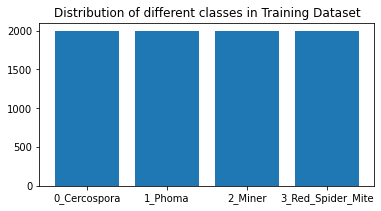

In [ ]:
nimgs={}
for i in LABELS:
  nimages=len(os.listdir('/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Training_set/Stage_3'+'/'+i))
  nimgs[i]=nimages
plt.figure(figsize=(6, 3))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()


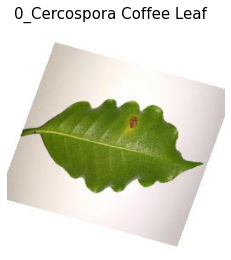

In [ ]:
img1 = load_img('/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Training_set/Stage_3/0_Cercospora/0_Cer (1000).jpg') 
plt.suptitle("0_Cercospora Coffee Leaf", size=15) 
plt.axis('off')
_=plt.imshow(img1)

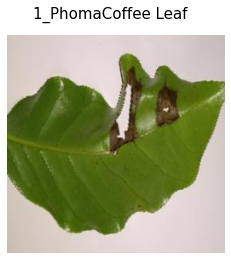

In [ ]:
img = load_img('/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Training_set/Stage_3/1_Phoma/1_Ph (1002).jpg')
plt.suptitle("1_PhomaCoffee Leaf", size=15)
plt.axis('off')
_ = plt.imshow(img)


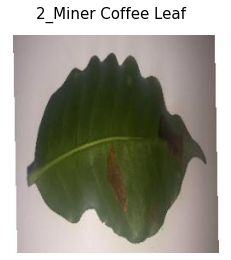

In [ ]:
img = load_img('/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Training_set/Stage_3/2_Miner/2_Min (1002).jpg')
plt.suptitle("2_Miner Coffee Leaf", size=15)
plt.axis('off')
_ = plt.imshow(img)

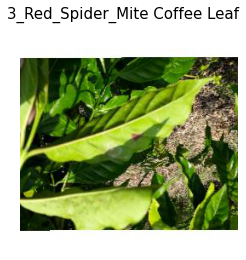

In [ ]:
img = load_img('/content/drive/MyDrive/‏‏Dataset_CLQC/Dataset/Training_set/Stage_3/3_Red_Spider_Mite/3_RSM (1003).jpg')
plt.suptitle("3_Red_Spider_Mite Coffee Leaf", size=15)
plt.axis('off')
_ = plt.imshow(img)

## Implementation of VGG 16





Let’s load the VGG16 model

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

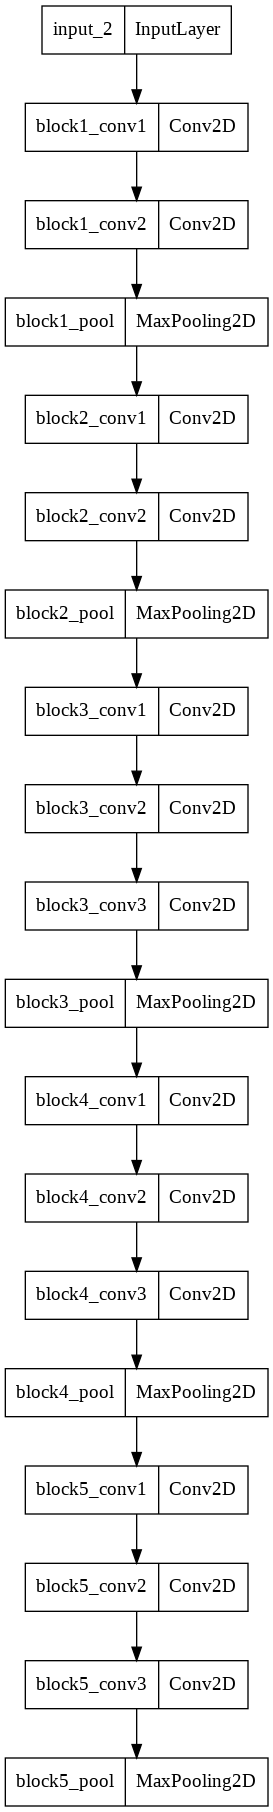

In [ ]:
vgg16 = VGG16(include_top=False,
    weights="imagenet",
    input_shape=IMAGE_SIZE + [3])
vgg16.summary()
keras.utils.plot_model(vgg16, "/content/drive/MyDrive/‏‏Dataset_CLQC/img/model_vgg16_org_stg3.png")

let’s makes the middle layers freeze.

In [ ]:
for layer in vgg16.layers:
  print(layer.name)
  layer.trainable = False

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


We have already removed the output layer by include_top = False.

Let’s add our own output layer with only one node.

In [ ]:
x = Flatten()(vgg16.output)
prediction = tf.keras.layers.Dense(4, activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=prediction)

There are a few metrics will be helpful when evaluating the performance of DL models:

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

Now we need to compile our model so that we can train it

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam' ,metrics=[METRICS])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

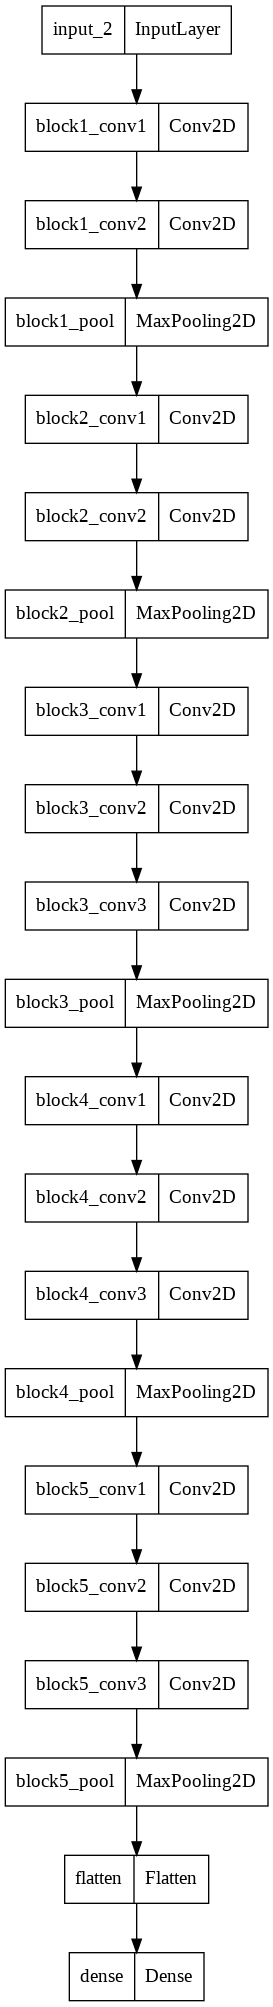

In [ ]:
model.summary()
keras.utils.plot_model(model, "/content/drive/MyDrive/‏‏Dataset_CLQC/img/model_vgg16_finl_stag3.png")

Let’s train our model

In [ ]:
checkpoint = ModelCheckpoint('VGG16_checkpoint_S3.h5', monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto')

early = EarlyStopping(monitor='val_loss', 
                      min_delta=0, 
                      patience=20, 
                      verbose=1, 
                      mode='auto')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                           patience=5, mode='min', verbose=1,
                           min_lr=1e-5)

vgg16_classifier = model.fit(
  training_set,  
  validation_data=valid_set,
  epochs = 500,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set),
  verbose = True,
  callbacks=[checkpoint, early, reduce_lr])


Epoch 1/500
1000/1000 [==============================] - ETA: 0s - loss: 0.8105 - tp: 5618.0000 - fp: 2053.0000 - tn: 21947.0000 - fn: 2382.0000 - accuracy: 0.8614 - precision: 0.7324 - recall: 0.7023 - auc: 0.9206 - prc: 0.8192
Epoch 1: val_accuracy improved from -inf to 0.93220, saving model to VGG16_checkpoint_S3.h5
1000/1000 [==============================] - 4854s 5s/step - loss: 0.8105 - tp: 5618.0000 - fp: 2053.0000 - tn: 21947.0000 - fn: 2382.0000 - accuracy: 0.8614 - precision: 0.7324 - recall: 0.7023 - auc: 0.9206 - prc: 0.8192 - val_loss: 0.4821 - val_tp: 151.0000 - val_fp: 22.0000 - val_tn: 509.0000 - val_fn: 26.0000 - val_accuracy: 0.9322 - val_precision: 0.8728 - val_recall: 0.8531 - val_auc: 0.9656 - val_prc: 0.9207 - lr: 0.0010
Epoch 2/500
1000/1000 [==============================] - ETA: 0s - loss: 0.6681 - tp: 6271.0000 - fp: 1587.0000 - tn: 22413.0000 - fn: 1729.0000 - accuracy: 0.8964 - precision: 0.7980 - recall: 0.7839 - auc: 0.9473 - prc: 0.8770
Epoch 2: val_accu

##Save Model

In [ ]:
model.save('/content/drive/MyDrive/‏‏Dataset_CLQC/pre_trained/Stage3_CLQC_VGG16_1.h5')
print("Saved!!!")

model.save_weights('/content/drive/MyDrive/‏‏Dataset_CLQC/pre_trained/Stage3_CLQC_VGG16_Wig.h5')
print("Saved weights!!!")

Saved!!!
Saved weights!!!


In [ ]:
#model = keras.models.load_model('/content/drive/MyDrive/‏‏Dataset_CLQC/pre_trained/CLQC_VGG16_re_1.h5')

## Evaluation
There are several ways to visualization for data:
- Plot Accuracy;
- Confusion Matrix;



**Plot Accuracy:**

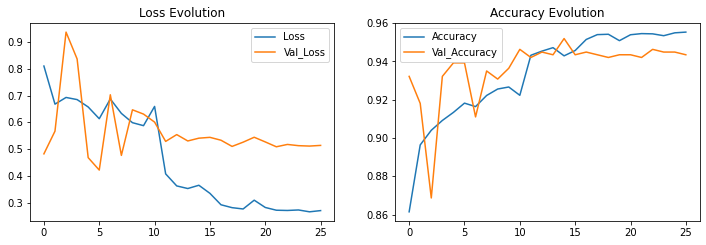

In [ ]:
plt.figure(figsize=(12, 8))
# accuracy
plt.subplot(2, 2, 1)
plt.plot(vgg16_classifier.history['loss'], label='Loss')
plt.plot(vgg16_classifier.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')
plt.savefig('acc1.png')
#loss
plt.subplot(2, 2, 2)
plt.plot(vgg16_classifier.history['accuracy'], label='Accuracy')
plt.plot(vgg16_classifier.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.savefig('loss1.png')

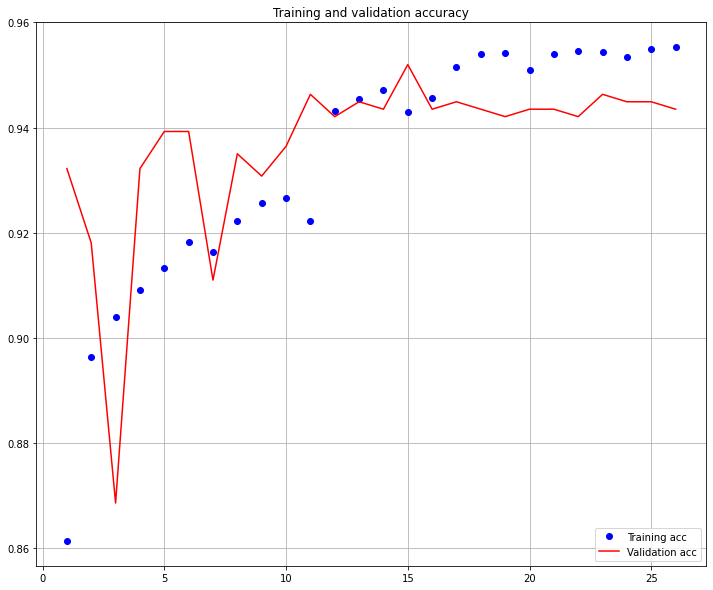

<Figure size 864x576 with 0 Axes>

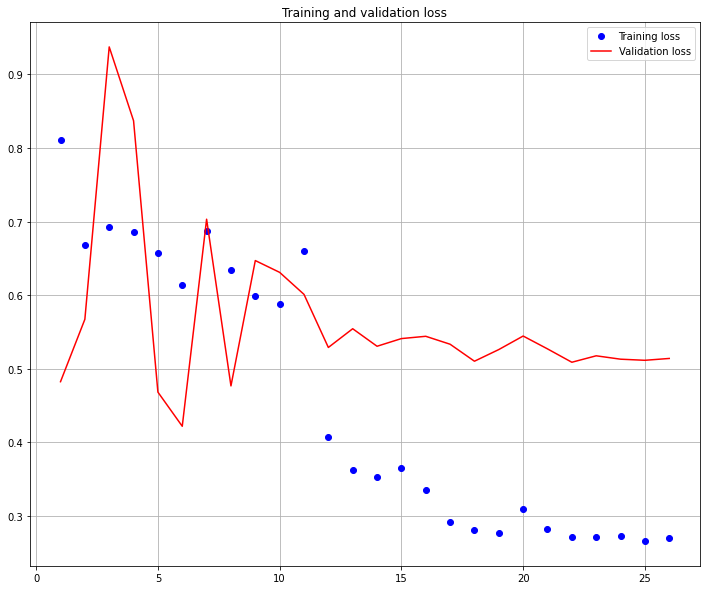

<Figure size 864x576 with 0 Axes>

In [ ]:

# accuracy
acc = vgg16_classifier.history['accuracy']
epochs = range(1, len(acc) + 1)
val_acc = vgg16_classifier.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.grid()

plt.savefig('acc.png')
plt.figure(figsize=(12, 8))
plt.show()

#loss
loss = vgg16_classifier.history['loss']
val_loss = vgg16_classifier.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.grid()

plt.savefig('loss.png')
plt.figure(figsize=(12, 8))
plt.show()

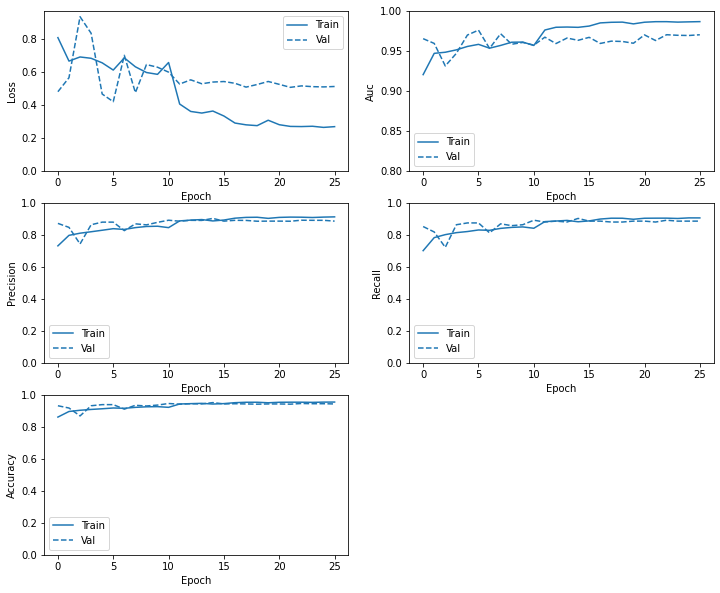

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall', 'accuracy']
  mpl.rcParams['figure.figsize'] = (12, 10)
  colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(3,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    elif metric == 'accuracy':
      plt.ylim([0,1])  
    else:
      plt.ylim([0,1])
 
    plt.legend()
plt.savefig('all.png') 
plot_metrics(vgg16_classifier)

**Confusion Matrix:**

In [ ]:
import numpy as np
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

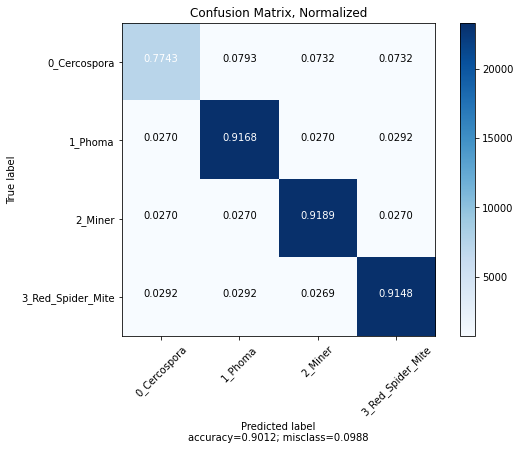

In [ ]:
plot_confusion_matrix(cm           = np.array([[ 7257.0000,  743.0000,  686.0000, 686.0000],
                                               [  686.0000,  23314.0000, 686.0000, 743.0000],
                                               [  686.0000,  686.0000,  23314.0000,686.0000],
                                                [743.0000,  743.0000,  686.0000, 23314.0000]]), 
                      normalize    = True,
                      target_names = ['0_Cercospora', '1_Phoma', '2_Miner', '3_Red_Spider_Mite'],
                      title        = "Confusion Matrix, Normalized")


#tp: 7257.0000 - fp: 686.0000 - tn: 23314.0000 - fn: 743.0000

#[tp,  fn, fp, fp],
#[fp,  tn, fp, fn],
#[fp,  fp, tn, fp],
#[fn,  fn, fp, tn]